# One sample T_test for detecting whether sample mean differs from population mean

In [1]:

ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [2]:
import numpy as np
agemean=np.mean(ages)
agemean

30.34375

In [3]:
len(ages)

32

In [5]:
sample_size=10

age_sample=np.random.choice(ages,sample_size)


In [6]:
age_sample

array([32, 32, 35, 55, 40, 30, 43, 10, 30, 20])

In [7]:
from scipy.stats import ttest_1samp

In [8]:
ttest,p_value=ttest_1samp(age_sample,30)

In [9]:
p_value

0.5039557632720958

# Conclusion

P value is more than 0.05 so we are accepting the null hypothesis that there is no difference between population and sample mean

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classB_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

loc=starting age  ,mu=sample mean  , size=sample size

In [11]:
classB_ages.mean()

47.03333333333333

In [12]:
school_ages.mean()

52.89666666666667

In [13]:
_,p_value=stats.ttest_1samp(a=classB_ages,popmean=school_ages.mean())

In [14]:
p_value

3.1519419696810426e-11

We are rejecting null hypothesis and accepting alternate so class ages  mean differs from school ages mean

# Two sample T_test

compares the mean of two independant groups

In [17]:
classA_ages=stats.poisson.rvs(loc=18,mu=33,size=60)

classA_ages.mean()

50.96666666666667

In [21]:
_,p_value=stats.ttest_ind(a=classB_ages,b=classA_ages,equal_var=False)


In [22]:
p_value

0.00011381958885145802

Rejecting null hypothesis that is classA ages mean differs from classB ages mean

# Paired T-test with Python

when you want to check how different samples from the same group are

In [23]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [24]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[18.74018404 36.16319766 24.90202358 22.61500786 28.40086175 21.44491283
 21.35220721 25.86228071 22.243996   20.88304066 31.71470377 16.73314274
 33.26817665 25.55819593 41.56564137]


In [25]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [26]:
weight_df

weight_10  weight_20  weight_change
0          25  18.740184      -6.259816
1          30  36.163198       6.163198
2          28  24.902024      -3.097976
3          35  22.615008     -12.384992
4          28  28.400862       0.400862
5          34  21.444913     -12.555087
6          26  21.352207      -4.647793
7          29  25.862281      -3.137719
8          30  22.243996      -7.756004
9          26  20.883041      -5.116959
10         28  31.714704       3.714704
11         32  16.733143     -15.266857
12         31  33.268177       2.268177
13         30  25.558196      -4.441804
14         45  41.565641      -3.434359

In [27]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [28]:
p_value

0.014275259359463924

we are accepting null hypothesis considering there is no difference in mean between two ages

# Correlation 

In [29]:
import seaborn as sns
df=sns.load_dataset('iris')

In [30]:
df.shape

(150, 5)

In [31]:
df.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

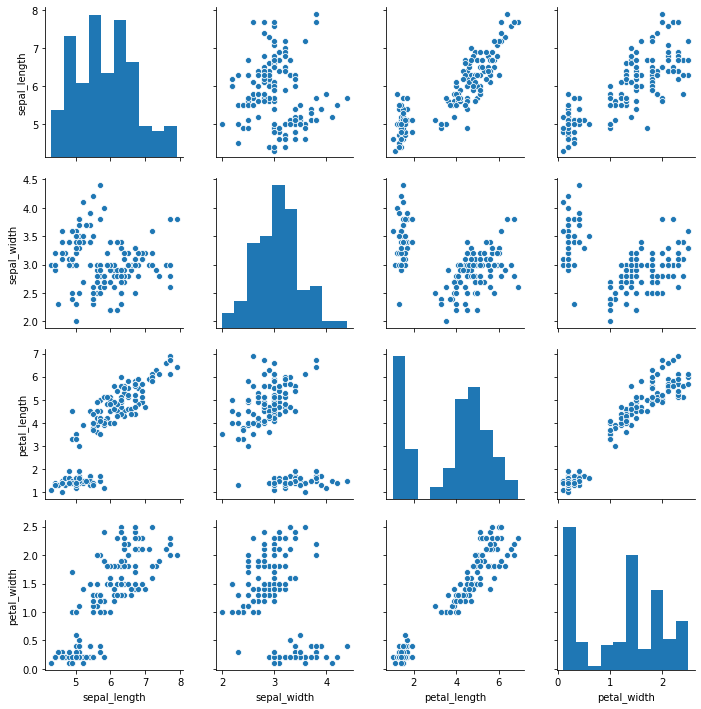

In [32]:
sns.pairplot(df)

# Chi-Square test

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [3]:
import scipy.stats as stats

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
dataset=sns.load_dataset('tips')

In [5]:
dataset

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [6]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
dataset_table

smoker  Yes  No
sex            
Male     60  97
Female   33  54

In [14]:
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [8]:
val=stats.chi2_contingency(dataset_table)

In [9]:
val

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [11]:
Expected_Values=val[3]

In [12]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [15]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [16]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [17]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [18]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [19]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# Anova Test(F-Test)

The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.

For example, if we wanted to test whether petal_width  differs based on some categorical variable like species, we have to compare the means of each level or group the variable

# One Way F-test(Anova)

It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not

In [20]:
import seaborn as sns
df1=sns.load_dataset('iris')

In [21]:
df1.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [22]:

df_anova = df1[['petal_width','species']]

In [27]:
grps = df_anova.species.unique()

In [28]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [29]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}

In [30]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64, 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85   

In [31]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [32]:
print(p)

4.169445839443116e-85


In [33]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


All three groups are dissimilar based on their petal_width